<span style="font-size:x-large;">Lab 8</span>

# The Environment Redux: Modelling Environmental Trends

In our financial case study (GDP per Capita) we looked at ways of quantitatively identifying or *modelling* trends in data.

We can now apply these new tools to identifying trends in some of our other case studies. In this lab we will focus again on the environment, starting with the sea level data.

## Modelling the Sea Level Data

We will begin by examining the sea level data from the Case Study "[Will UWA Go Under Water](https://share.cocalc.com/share/340b0d97e40dc3a353a6f846ab37c60492bdc288/Share/RisingTide.pdf)" (RisingTides). Recall that this case study used sea level measurements from the National Oceanography Centre's [Permanent Service for Mean Sea Level](https://www.psmsl.org/) (PSMSL). We focussed on the Fremantle station, which had longitudinal data dating back to 1897.

### Data acquisition and cleaning

The data acquisition was covered in the Case Study. We'll use the same source here and once again make use of the data from the Fremantle monitoring station (Station 111). The original data is provided in the file `111.rlrdata.txt` included with this lab.

* Have another look at this data to refresh your memory of the format.

Recall there were some [Data Notes](https://www.psmsl.org/data/obtaining/notes.php) that explained the columns, or *fields*, in more detail.


#### Loading the data

We also have some more efficient tools now for processing the data, and this time we'll read them straight into numpy arrays.

Recall that last time we stored each column in a list, and combined them into a list of tuples where needed by 'zipping' the lists together.

This time we will instead store all the relevant columns in a single 2-D array.

We found from the Case Study that the flags (column 4) didn't provide us with any information, so we are going to store the first 3 columns in an $n \times 3$ array (that is, some number $n$ rows, and 3 columns).

Since we are only dealing with numerical data this will provide a concise and efficient way of doing it. One disadvantage is that we will no longer have the variables like `dates` and `msls` (mean sea levels) to refer to the data in the different fields. (We will see another around this in the next case study!)

If our data is in an $n \times 3$ array called, say, `sealevel_data`, we know we can pick out the columns using array selection. So for example we could get the date column using `sealevel_data[:,0]` (all rows, column 0).

This can get a little difficult to read and debug, so a better idea is to use a meaningful constant (say DATE) for the date column, and another for the mean sea level column, and so on. Then we can instead write `sealevel_data[:,DATE]`. This immediately shows the intent of the code, and makes it easier to read and maintain.

So we'll start with the following constants:


In [1]:
FREO_DATA = '111.rlrdata.txt'
(DATE, MSL, MISSING) = (0, 1, 2)


* Read the first 3 columns of the sea level data into an array using `np.loadtxt()` (1 line of code). Check the array shape and data type are as you would expect.

Hint: You don't need to use array selection to remove the fourth column, check the API.

Note: Because arrays are homogenous, numpy will attempt to find the *least general* data type to which it can cast *all* of the data.

In [2]:
import numpy as np

sealevel_data = np.loadtxt(FREO_DATA, delimiter = ";", usecols = (0, 1, 2), dtype = {'names': ('DATE', 'MSL', 'MISSING'), 'formats': ('float64', int, int)})

sealevel_data.dtype
sealevel_data.shape 
# (1476,)

(1476,)

In [3]:
import numpy as np

sealevel_data = np.loadtxt(FREO_DATA, delimiter = ";", usecols = (DATE, MSL, MISSING))

sealevel_data.dtype
sealevel_data.shape
sealevel_data[:10,:3]

array([[1.8970417e+03, 6.5420000e+03, 9.0000000e+00],
       [1.8971250e+03, 6.5240000e+03, 0.0000000e+00],
       [1.8972083e+03, 6.5570000e+03, 0.0000000e+00],
       [1.8972917e+03, 6.6550000e+03, 0.0000000e+00],
       [1.8973750e+03, 6.6480000e+03, 0.0000000e+00],
       [1.8974583e+03, 6.7290000e+03, 0.0000000e+00],
       [1.8975417e+03, 6.6410000e+03, 1.0000000e+00],
       [1.8976250e+03, 6.5180000e+03, 0.0000000e+00],
       [1.8977083e+03, 6.5470000e+03, 0.0000000e+00],
       [1.8977917e+03, 6.4650000e+03, 0.0000000e+00]])

In [4]:
mask1 = sealevel_data[:, MSL] != -99999

sealevel_edit = sealevel_data[mask1]
sealevel_edit.shape

(1367, 3)

#### Cleaning the data

The next step was to remove the dates (months) with missing data. These had the mean sea level recorded as -99999.

To do this we introduced the idea of masking, and masked each list (dates, msls and missing days) separately.

With a 2-D array we can mask all the columns at once. Remember that "masking" is just a form of selection where we use a boolean (or integer) array. In this case, we'll apply that selection to the rows, and take all the columns.

* Use masking/selection (no loops) to create a new array with the lines with missing readings removed. (about 2 lines)

As usual, as a 'sanity check' output the resulting shape.


In [5]:
mask2 = sealevel_edit[:, MISSING] <= 5

sealevel = sealevel_edit[mask2]
sealevel.shape

(1339, 3)

Recall that we adopted a data cleaning policy where we rejected *any month with more than 5 missing days*.

* Use masking/selection to create a new array with the months with more than 5 missing days removed. (~2 lines)

As usual check the shape.

#### Putting it together [1 lab mark]

* Write a function `get_clean_data(station)` that:
  * reads in the data from the filename in `station`
  * removes any missing months
  * removes any months with 6 or more missing days
  * returns an $n \times 2$ array of floats containing the remaining dates and mean sea levels
  
Your function should use numpy arrays. It should not use lists or loops. You may assume the above assignments to the constants DATE, MSL and MISSING (that is, they don't need to be passed into the function).

In [6]:
def get_clean_data(station):
    """
    Obtains data from file station and removes missing months
        and months with 6 or more missing days.
    Returns an n x 2 array of months and mean sea levels.
    """
    sealevel_data = np.loadtxt(station, delimiter = ";", usecols = (DATE, MSL, MISSING))

    mask1 = sealevel_data[:, MSL] != -99999
    sealevel_edit = sealevel_data[mask1]

    mask2 = sealevel_edit[:, MISSING] <= 5
    sealevel = sealevel_edit[mask2]

    return sealevel[:,:2]

In [7]:
from nose.tools import assert_equal, assert_true
freo_data = get_clean_data(FREO_DATA)
assert_true(np.isclose(freo_data[0], np.array([1897.125, 6524])).all())
print("So far, so good. Please continue with your own testing.")


So far, so good. Please continue with your own testing.


## Data Visualisation and Modelling

We'll start from one of the points we got to in RisingTides, but replicate it directly from numpy.

* Produce a scatter plot of the Fremantle data, along with a line showing the mean.
  * Set the transparency (alpha value) of the scatter plot to 0.5.
  * Draw the mean as a yellow line, with a line width of 4.
  * Include a legend.

Your graph should look like this.

<div>
<img src="mean.png" width="700">
</div>



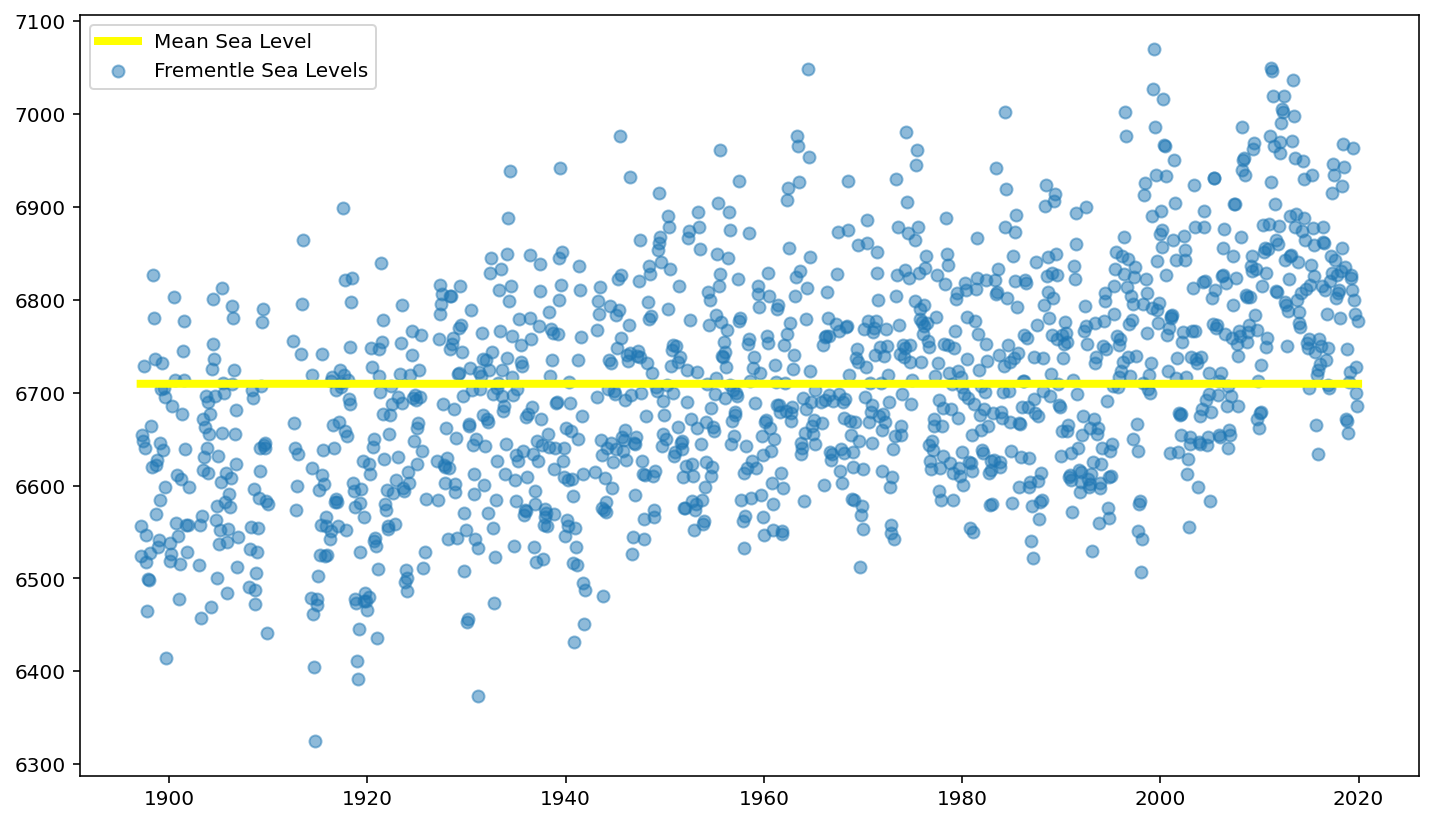

In [8]:
import matplotlib.pyplot as plt

plt.scatter(sealevel[:, DATE], sealevel[:, MSL], alpha = 0.5, label = 'Frementle Sea Levels')

# This is how you get their mean sea level
mean_sealevel = np.mean(sealevel[:, MSL])
xs = sealevel[:, DATE]
ys = np.ones(len(xs)) * mean_sealevel

plt.plot(xs, ys, color = 'yellow', linewidth = 4, label = 'Mean Sea Level')

plt.legend()

plt.show()

### Linear Regression and `scipy.stats`

We know how to do linear regression from first principles. In this lab, however, we'll explore some libraries that are very handy for future use.

For this section, we'll briefly introduce a very useful library - the [`scipy.stats` library](https://docs.scipy.org/doc/scipy/reference/stats.html) - another part of the "Scientific Python" collection.

* Look for the heading *Correlation functions* and find the `linregress()` method. Have a look at its API.

You'll see that it performs a linear regression computation for you and returns a 5-tuple. We will make use of the `slope` and `intercept`, but the function also returns some other statistics relating to the confidence of the observed relationship between the x and y data.

Note: While we're on that page, notice in the "See also:" section, that there is another handy SciPy library, `scipy.optimize`, that will perform least squares optimisation (like we did in the GDP case study) on arbitrary functions.

* Import `linregress` and use it to plot a linear model against the sea level data.

Tip: Use the form of `linregress` that doesn't require you to use the second ('y') parameter, to take the 2-D array directly.

Plot the linear model in red with a line width of four, and an appropriate legend.



In [9]:
sealevel = sealevel[:, :2]
sealevel.shape

(1339, 2)

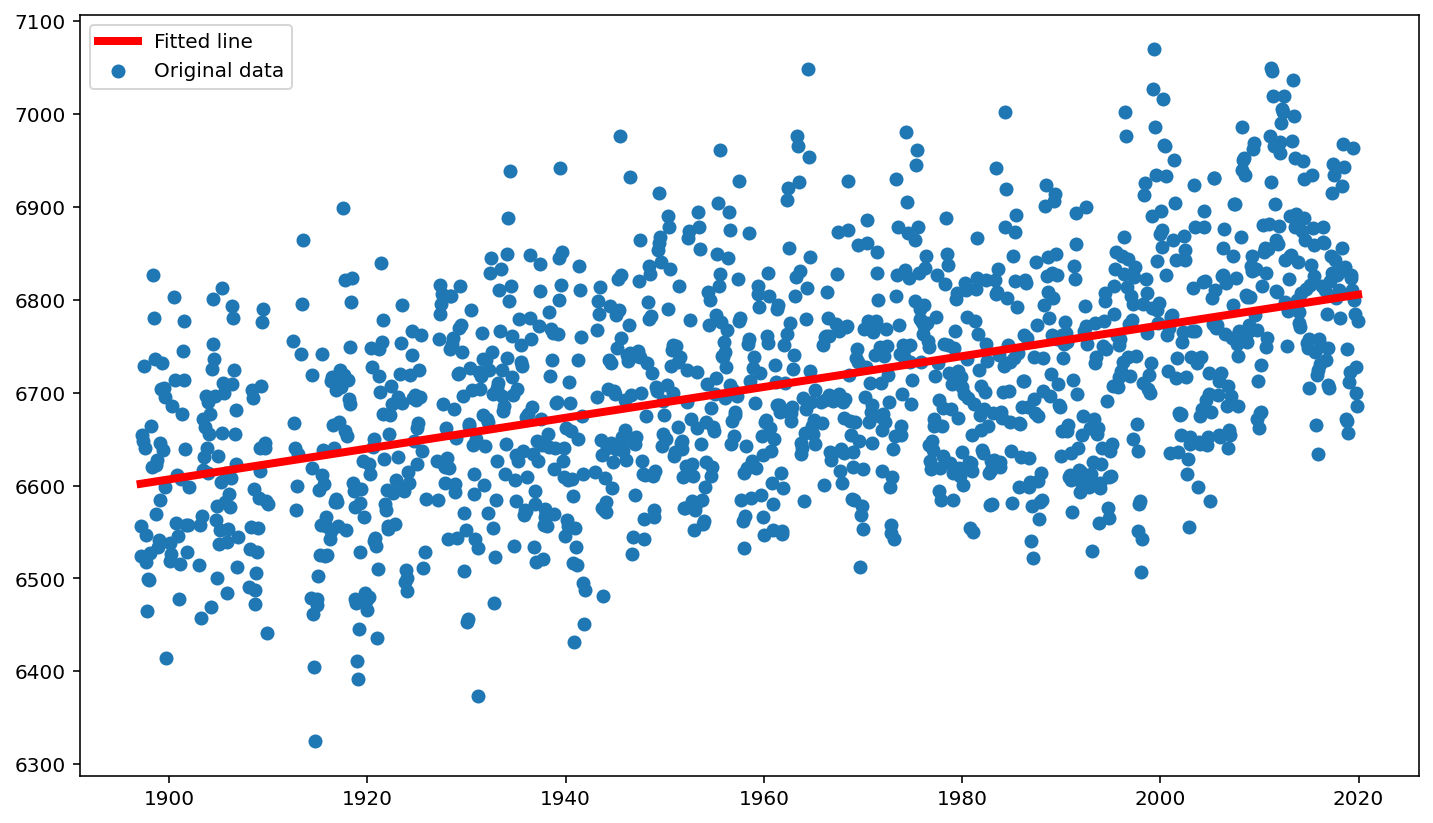

In [10]:
# Perform a linear regression

from scipy import stats

slope, intercept, r_value, p_value, stderr = stats.linregress(sealevel)

plt.scatter(sealevel[:, DATE], sealevel[:, MSL], label = "Original data")
plt.plot(sealevel[:, DATE], slope * sealevel[:, DATE] + intercept,
         color = "red", linewidth = 4, label = "Fitted line")

plt.legend()
plt.show()

* According to your model, what is the rate of increase (to two decimal places) in sea level?

To answer this you will need to consider what units the slope is expressed in.

* Print out the rate of increase with the appropriate units.

In [11]:
# The rate of increase in sea level is the slope
round(slope - 1, 2)
# So the increase rate is 0.66

0.66

#### Predicting the sea level [1 lab mark]

* Write a method `predicted_level(historical_data, datetime)` that takes a set of historical data in the format returned by `get_clean_data()` and a "`datetime`" (see below) and returns the predicted sea level at that datetime in *meters*, rounded to 2 decimal places.

For this data we'll simply represent the 'datetime' as a float. The whole part of the float represents the year. The fractional part represents a fraction of a year. So, for example, 2020 represents midnight on the last day of 2019, and 2020.5 represents the halfway point of 2020.

For our modelling we'll assume that the dates in `111.rlrdata` are expressed in this format. We know that this is not quite true and will introduce a small error, because the dates are expressed as the midpoints of months, assuming each month is one twelfth of a year. So the representation of time used by The Permanent Service for Mean Sea Level is actually nonlinear. We could fix this, but it would distract from the aims of the lab.

Mini-challenge: What is the most it can be out by? (That is, the largest error in datetime this will introduce?)

---

* What does your model predict will be the mean sea level in 2020? Add some grid lines to your plot to see if this rings true.
* What does your model predict the mean sea level will be in 2050? 2100? 3000?


In [12]:
def predicted_level(historical_data, datetime):

    # Return the predicted sealevel at that datetime in meters,
    #     rounded to 2 decimal places

    # No need to do it. Already clean the data before passing into the func
    # sealevel = get_clean_data(historical_data)

    slope, intercept, r_value, p_value, stderr = stats.linregress(historical_data)

    # Need to transfer to the meters
    return round((slope * datetime + intercept) / 1000, 2)


In [13]:
from nose.tools import assert_equal, assert_true
freo_data = get_clean_data(FREO_DATA)
assert_equal(predicted_level(freo_data, 2020), 6.81)
assert_equal(predicted_level(freo_data, 2080), 6.91)


As we saw in the GDP case study, there may be differences between shorter term trends and longer term trends.

* Repeat your linear model plot from above, but this time add an extra black line showing the linear trend for the *second half of the data*.

Should there be an odd number of data points, include the midpoint in the second half. Use a linewidth of 4 for all lines.

Tip: You may find the `np.ceil()` function useful.

* What is the rate of increase for the second half of the data? How does this compare with the data as a whole?

* What are the predicted sea levels for 2020, 2050, 2100 and 3000 using the second half of the data? How do these compare with the whole data?


(623, 2)
(716, 2)


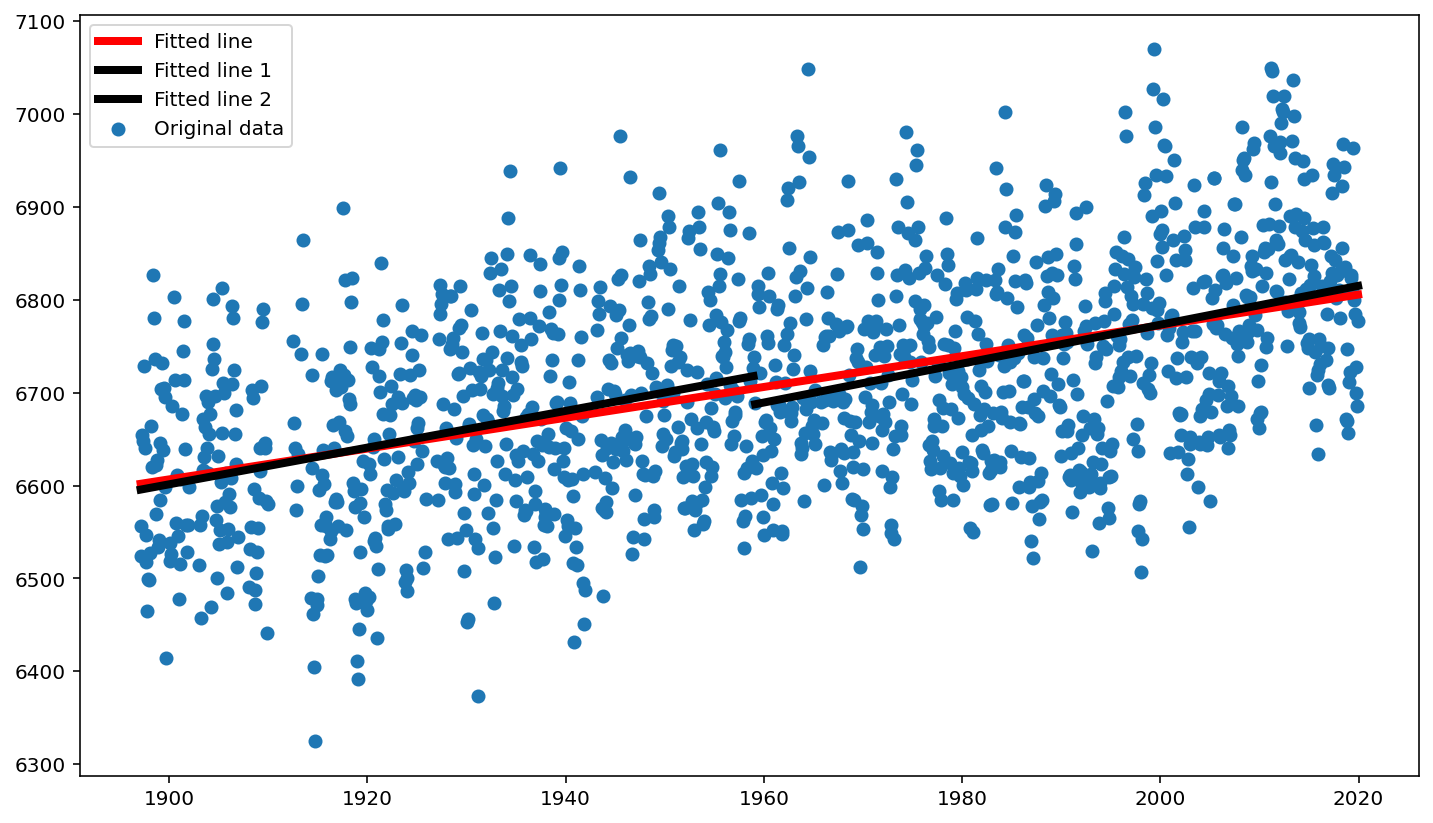

In [14]:
slope, intercept, r_value, p_value, stderr = stats.linregress(sealevel)

plt.scatter(sealevel[:, DATE], sealevel[:, MSL], label = "Original data")
plt.plot(sealevel[:, DATE], slope * sealevel[:, DATE] + intercept, color = "red",
         linewidth = 4, label = "Fitted line")

# Firts I need to split the line into 2 part (from 1897 to 2019)
first = sealevel[0, DATE]
last = sealevel[-1, DATE]
mid = np.ceil((first + last) / 2)

# Why do I need to ceil function...
mask1 = sealevel[:, DATE] < mid
mask2 = sealevel[:, DATE] >= mid

first_half = sealevel[mask1]
second_half = sealevel[mask2]

print(sealevel[mask1].shape)
print(sealevel[mask2].shape)

slope1, intercept1, r_value1, p_value1, stderr1 = stats.linregress(first_half)
slope2, intercept2, r_value2, p_value2, stderr2 = stats.linregress(second_half)

plt.plot(first_half[:, DATE], slope1 * first_half[:, DATE] + intercept1, color = "black",
         linewidth = 4, label = "Fitted line 1")
plt.plot(second_half[:, DATE], slope2 * second_half[:, DATE] + intercept2, color = "black",
         linewidth = 4, label = "Fitted line 2")

plt.legend()
plt.show()

### Piecewise linear models

Extending on the above idea, we will generate a piecewise linear model for the whole data.

* Divide the data into quartiles (4 segments). Again plot the data points, and plot the linear model in red. Plot the four new segments in black.

This time, use `numpy.array_split()` to divide the data in four.

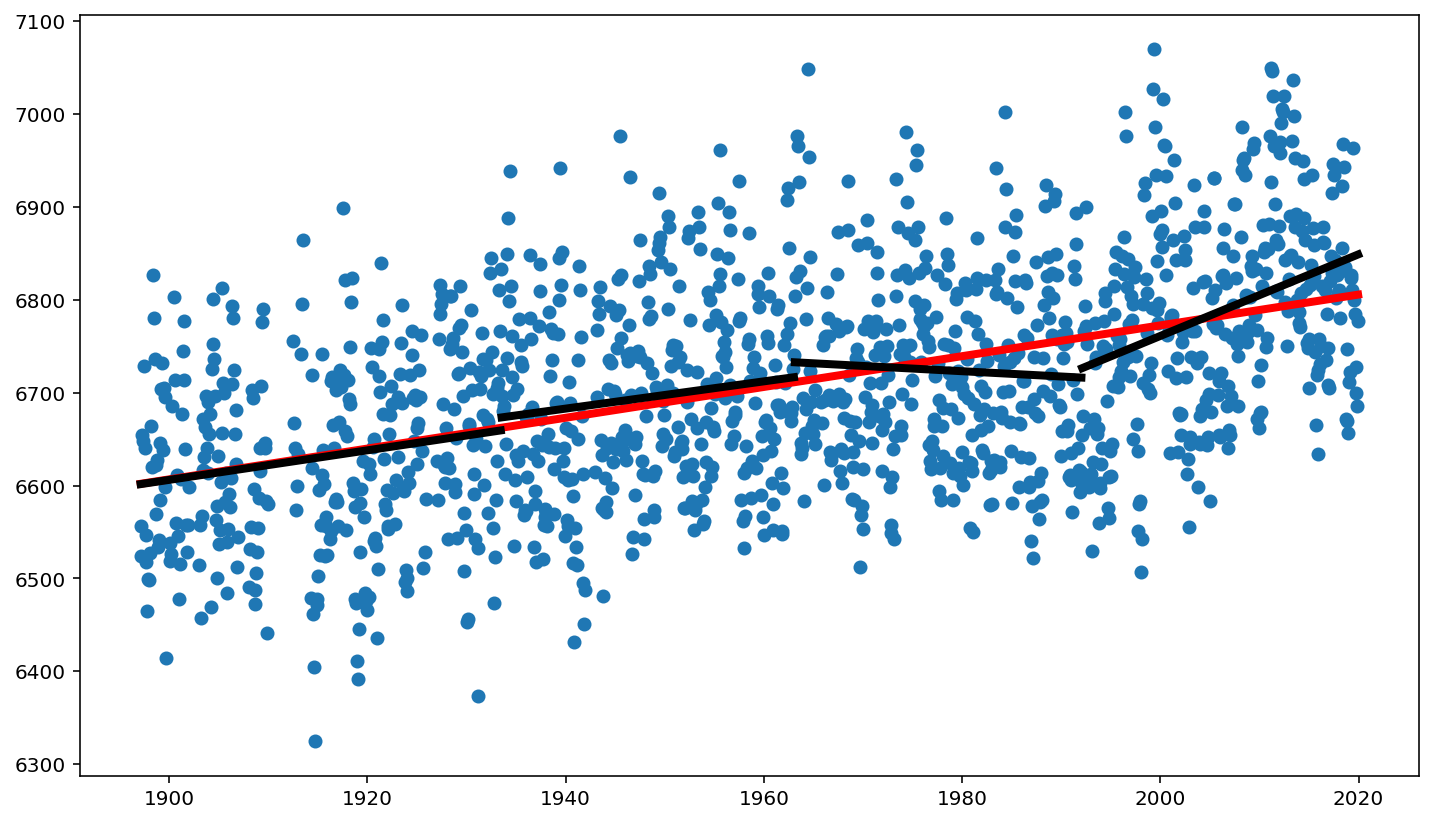

In [15]:
plt.scatter(sealevel[:, DATE], sealevel[:, MSL], label = "Original data")
plt.plot(sealevel[:, DATE], slope * sealevel[:, DATE] + intercept, color = "red",
         linewidth = 4, label = "Fitted line")

split_sealevel = np.array_split(sealevel, 4)

# split_sealevel is a list with 4 arrays as its elements

for i in range(4):
    tups = stats.linregress(split_sealevel[i])
    plt.plot(split_sealevel[i][:, DATE], tups[0] * split_sealevel[i][:, DATE] + tups[1], color = "black", linewidth = 4)

plt.show()

#### Piecewise linear modelling function [1 lab mark]

* Write a function `piecewise_linear(data, segments, quiet=False)` that:
  * takes a set of data in the format returned by `get_clean_data()`
  * takes a number of segments, `segments`, into which to split the data (as split by `numpy.array_split()`)
  * takes a boolean argument `quiet` that can be used to 'turn off' the graphical output, that defaults to False
  * if `quiet` is False, plots the data points, line of best fit (linear model) for the whole data, and 'segments' line segments fitting each of the segments of data
  * returns a "segments x 2" array of parameters for the linear 'pieces' where:
    * the first column contains the slopes for each segment
    * the second column contains the intercepts for each segment

For example, for 10 segments your output should look like this:

<div>
<img src="segments.png" width="700">
</div>



In [16]:
def piecewise_linear(data, segments, quiet=False):

    seg = []

    split_data = np.array_split(data, segments)

    slope, intercept, r_value, p_value, stderr = stats.linregress(data)

    for i in range(segments):
        tups = stats.linregress(split_data[i])
        seg.append((tups[0], tups[1]))

    if not quiet:
        plt.scatter(data[:, DATE], data[:, MSL], label = "Original data")
        plt.plot(data[:, DATE], slope * data[:, DATE] + intercept, color = "red", linewidth = 4, label = "Fitted line")
        for i in range(segments):
            plt.plot(split_data[i][:, DATE], seg[i][0] * split_data[i][:, DATE] + seg[i][1], color = "black", linewidth = 4)
        plt.legend()
        plt.show()

    return np.array(seg)


In [17]:
from nose.tools import assert_equal, assert_true
freo_data = get_clean_data(FREO_DATA)
parameters = piecewise_linear(freo_data, 10, True)
assert_true(np.isclose(parameters[3,:], np.array([ 8.00435815e+00, -8.87899164e+03])).all())
assert_true(np.isclose(parameters[:,0], np.array([ 1.92811184,  8.25061015,  0.94959073,  8.00435815,  1.38211083,
       -0.48934848, -1.22357932,  5.51171932,  1.36488971, -6.27671185])).all())
print("So far, so good. Please continue with your own testing.")


So far, so good. Please continue with your own testing.


The above model is quite disjoint. An alternative is to join the midpoints of each line segment. Or alternatively, join the means of each data segment.

* Plot another line on your plot from above by:
  * finding the median of the dates in each segment of data (xs)
  * finding the mean of the sample points (sea levels) in each segment of data (ys)
  * plotting a line of the ys against the xs (in a new colour)

You should have a single piecewise-linear line joining up the individual segments.

Try this for different numbers of segments, ranging from about 3 to 100. What do you notice as you get to higher numbers of segments? (How does this relate to a rolling average?)

What sort of numbers would you say offer a reasonably useful/informative model?

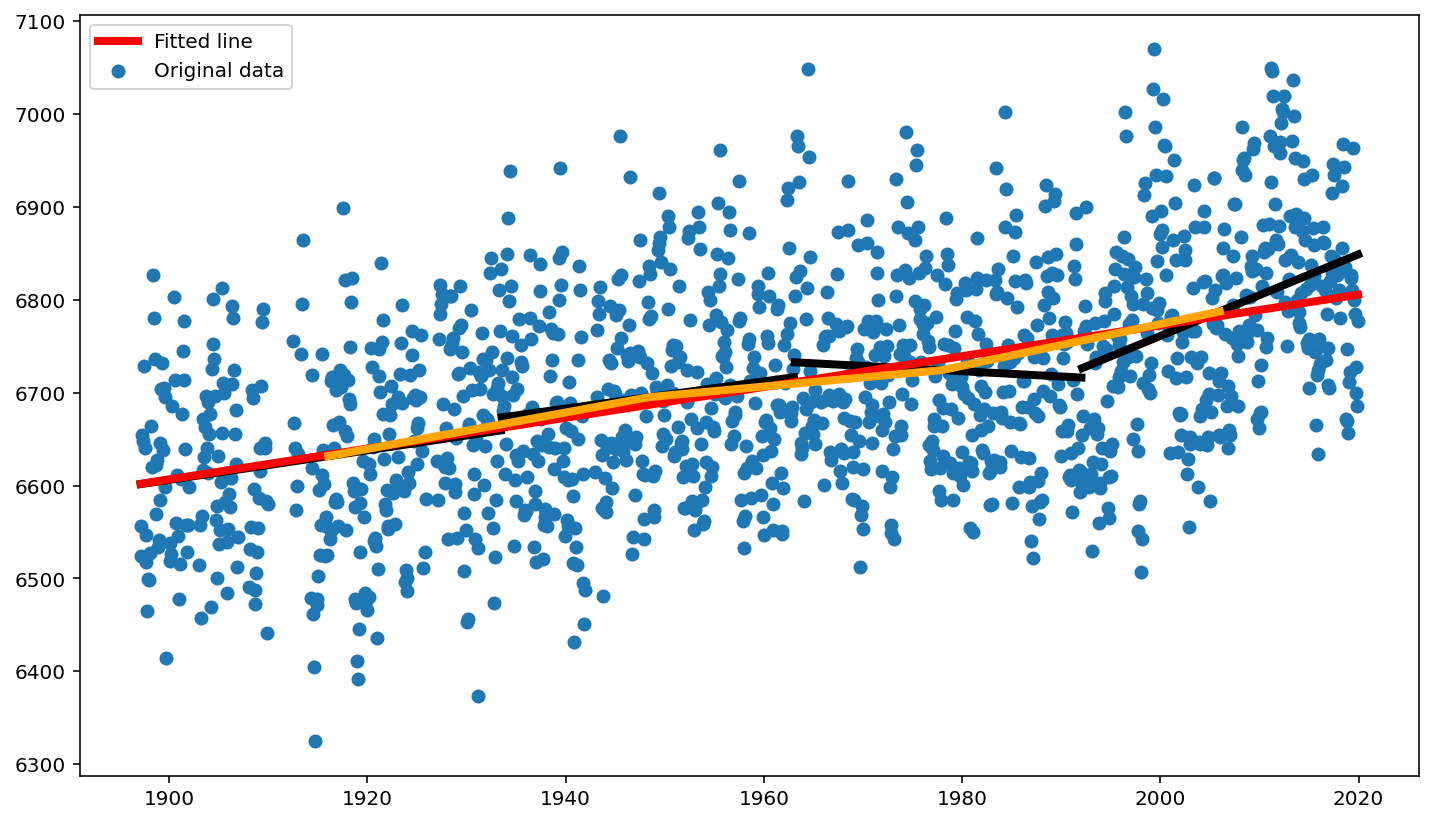

array([[ 1.59162613e+00,  3.58209770e+03],
       [ 1.46755584e+00,  3.83586637e+03],
       [-5.69008757e-01,  7.84983551e+03],
       [ 4.39726527e+00, -2.03338577e+03]])

In [18]:
def one_line(data, segments, quiet=False):

    seg = []
    segmeanx = []
    segmeany = []

    split_data = np.array_split(data, segments)

    slope, intercept, r_value, p_value, stderr = stats.linregress(data)

    for i in range(segments):
        tups = stats.linregress(split_data[i])
        segmeanx.append(np.mean(split_data[i][:, DATE]))
        segmeany.append(np.mean(split_data[i][:, MSL]))
        seg.append((tups[0], tups[1]))

    if not quiet:
        for i in range(segments):
            plt.plot(split_data[i][:, DATE], seg[i][0] * split_data[i][:, DATE] + seg[i][1], color = "black", linewidth = 4)
        plt.scatter(data[:, DATE], data[:, MSL], label = "Original data")
        plt.plot(data[:, DATE], slope * data[:, DATE] + intercept, color = "red", linewidth = 4, label = "Fitted line")
        plt.plot(segmeanx, segmeany, color = "orange", linewidth = 4)
        plt.legend()
        plt.show()

    return np.array(seg)

data = get_clean_data(FREO_DATA)
one_line(data, 4, quiet=False)

## Polynomial Models and `scikit-learn`

In this unit we have made a point of not using 'black box' code from libraries before we understand it well enough that we could write the code ourselves.

We are going to make one exception with regression on polynomials (as it would take a lot of time to do it in detail). However, as mentioned in the lectures/videos, we know conceptually how we would do it:
 * we know that there will be a number of parameters (or coefficients) based on the order (or degree) of the polynomial function
 * we know that there will be an error function, such as MSE, typically based on least squared error
 * we know that the code will try to choose parameters that minimise that error

So that we can see how polynomial models work for our data we'll use the machine learning toolkit `scikit-learn` and provide some 'helper functions' so that we can just use it without needing to go into the details.

In [19]:
from sklearn.linear_model import LinearRegression  # don't need to memorise this stuff
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def fit_polynomial_model(xs, ys, order=1):
    model = Pipeline([('poly', PolynomialFeatures(degree=order)), ('linear', LinearRegression())])
    model.fit(xs.reshape(-1,1), ys)
    return model

def get_predictions(model, xs):
    predictions = model.predict(xs.reshape(-1,1))
    return predictions

#### Linear model

* Using the two functions above, plot the data with a first-order polynomial model.

Because we'll be plotting a number of lines on the same graph, this time we'll use the default colour cycle. So that the first line is not the same colour as the scatter plot, use `plt.plot()` rather than `plt.scatter()` to produce the scatter plot. You can do this by setting the linestyle to None, and the marker to a circle:

```
plt.plot(my_xs, my_ys, 'o', ls=' ', alpha=0.5, label='Fremantle Sea Levels')
```

Your output should look like this:

<div>
<img src="firstorder.png" width="700">
</div>


#### Second-order model

Based on your earlier work, you have probably made some predictions about which way a second-order model will "bend".

* Add a second-order model to your plot.

Does it bend in the direction you expected? Does it bend as much as you anticipated? If not, why do you think this is the case?



#### Higher-order models

* Add a third-order polynomial model to your plot.

Is this more what you might have anticipated? If so, why do you think the 3rd order model is better able to achieve it?

* Try adding a fouth-degree polynomial model to your plot.

Does the extra degree of freedom add any value? 

### Sea level modelling conclusions - scenario planning and risk mitigation

* Given the length of time-series you have available, and all the modelling you've done, what would you suggest is the "best" model (or models) for the data?

Note that the best model is subjective - there is not a single right answer.

Because there is never a single "right" model, as sensible approach (which doesn't seem to be taken often enough in today's politics) is to engage in *scenario planning* - looking at a number of reasonable models and their implications, and planning accordingly.

The more potentially damaging or catastrophic the impacts of a scenario, the more important it is to include "*worst case models*" and mitigate against the risks. This is known as *risk mitigation*.

* What are the potential implications of your different sea-level models for the world?

## Regression Models for Rainfall and Temperature

The general trend in the sea level data, given the length of time over which it was recorded, was fairly easy to recognise with the 'naked eye'. The rainfall data (from the Rainfall lab) and temperature data (from the Heat lab) were not as clear cut.

We did some quanititative analysis using stepwise linear models based on means.

We now have the tools to do a more comprehensive quantitative analysis using polynomial models!

Using a new notebook (it will be faster to not have all the datasets in memory), investigate those data and see what you find!

## Challenge

In the CensusAge lab we implemented a "spread" function to "interpolate" the age data for age bands above 80. At the end you were asked to think about more realistic ways of spreading the individuals amongst the age categories.

Could any of your modelling techniques be used as a more justifiable way of augmenting the data? Give this a try!

&copy; Cara MacNish